# Hyperparameter tuning

##### XGBoost model 
##### annotation result 0, 1, 2 (multiclass classification)
##### 결측치 mean()
##### age, gender 제외한 모든 항목 insert
#### **** 중요한 feature에 가중치 부여

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('judge 제거_LCE.csv')

## Preprocessing
#### 1. annotation result = 3, Null drop

In [45]:
# annotation result = 0, 1, 2 만 남기고 확인 

null_annot = list(np.where(df['annotation_result'].isna() == True)[0])
df = df.drop(null_annot, axis = 'index')
df.index = range(len(df))

three_annot = list(np.where(df['annotation_result'] == 3)[0])
df = df.drop(three_annot, axis = 'index')
df.index = range(len(df))

df['annotation_result'].unique()

array([1., 0., 2.])

In [46]:
zero = list(np.where(df['annotation_result'] == 0)[0])
one = list(np.where(df['annotation_result'] == 1)[0])
two = list(np.where(df['annotation_result'] == 2)[0])
df['annotation_result'][zero] = 0
df['annotation_result'][one] = 0
df['annotation_result'][two] = 1

df['annotation_result'].unique()

array([0., 1.])

## X, y 정의 후 train, validation, test split

In [47]:
df = df.fillna(df.mean())
df

#최빈값
#df = df.fillna(df.mode().iloc[0])
#df

#중앙값
#df = df.fillna(df.median().iloc[0])
#df

,sample_date,hospital_number_id,hospital_number,annotation,annotation_result,age,gender,N817,T103,H103,...,L464,H129,C203,H102,C180,C159,L620,L621,L622,L623
0,2019.4.16,481,4,1,0.0,53.653046,NaN,358.419705,2359.84,6860.0,...,25.000000,325.450617,10.277011,4.66,102.298817,85.343612,1024.17,599.40,167.944515,131.844893
1,2019.4.16,395,23,1,0.0,53.653046,NaN,358.419705,1062.89,6770.0,...,19.600000,325.450617,10.277011,4.92,102.298817,85.343612,426.22,196.63,167.944515,131.844893
2,2019.11.7,395,23,1,0.0,53.653046,NaN,430.700000,1773.36,8210.0,...,10.100000,325.450617,4.900000,4.86,102.298817,78.000000,897.32,322.75,167.944515,131.844893
3,2017.11.1,397,24,1,0.0,53.653046,NaN,358.419705,2389.20,7240.0,...,13.022909,325.450617,10.277011,4.90,102.298817,85.343612,1134.87,346.43,167.944515,131.844893
4,2018.1.31,66,29,1,0.0,54.000000,F,358.419705,1716.81,6430.0,...,13.022909,325.450617,10.277011,3.99,102.298817,85.343612,743.38,326.19,167.944515,131.844893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,2022.8.17,385,1843,1,0.0,58.000000,F,40.000000,2910.57,6630.0,...,6.300000,356.000000,10.200000,4.30,93.000000,141.000000,2018.00,453.00,179.000000,86.000000
1780,2022.7.5,387,1846,1,0.0,57.000000,F,40.000000,1928.50,4750.0,...,15.100000,260.000000,10.700000,3.79,90.000000,106.000000,911.00,591.00,112.000000,197.000000
1781,2022.7.8,388,1847,1,0.0,49.000000,F,40.000000,1792.92,6690.0,...,11.000000,269.000000,16.800000,4.13,95.000000,22.000000,825.00,515.00,205.000000,138.000000
1782,2022.8.3,389,1852,1,1.0,51.000000,F,40.000000,1892.02,4940.0,...,20.100000,455.000000,9.800000,4.24,86.000000,42.000000,828.00,527.00,237.000000,198.000000


In [48]:
# Select all columns except certain columns
X = df.iloc[:,7:]
y = np.ravel(df.loc[:, ['annotation_result']])

from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Training set:  (1427, 72) (1427,)
Test set:  (357, 72) (357,)


## Scaler 

In [49]:
# 1. Standard Scaler
from sklearn.preprocessing import StandardScaler, RobustScaler, scale

# Initialize the StandardScaler
#standard_scaler = StandardScaler()
# Fit the scaler on the training data
#standard_scaler.fit(X_train)
# Scale the training, validation, and test data using the scaler
#X_train_standard = standard_scaler.transform(X_train)
#X_val_standard = standard_scaler.transform(X_val)
#X_test_standard = standard_scaler.transform(X_test)


# 2. Initialize the RobustScaler
robust_scaler = RobustScaler()
# Scale the training, validation, and test data using the scaler
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)

## XGBoost hyperparameter

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'max_depth': range(3, 10),
    'n_estimators': range(50, 200, 10),
    'min_child_weight': range(1, 6),
    'subsample': np.arange(0.5, 1, 0.05),
    'colsample_bytree': np.arange(0.5, 1, 0.05)
}

# Create an XGBoost classifier object
clf = XGBClassifier()

# Define the random search object
random_search = RandomizedSearchCV(
    clf, param_distributions=param_grid, n_iter=100,
    cv=5, scoring='f1', n_jobs=-1, verbose=1
)

# Fit the random search object to the data
random_search.fit(X, y)

# Print the best parameters and score
print('Best parameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'subsample': 0.7000000000000002, 'n_estimators': 170, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.04, 'colsample_bytree': 0.8000000000000003}
Best score: 0.5566310912483698


# Machine Learning Model

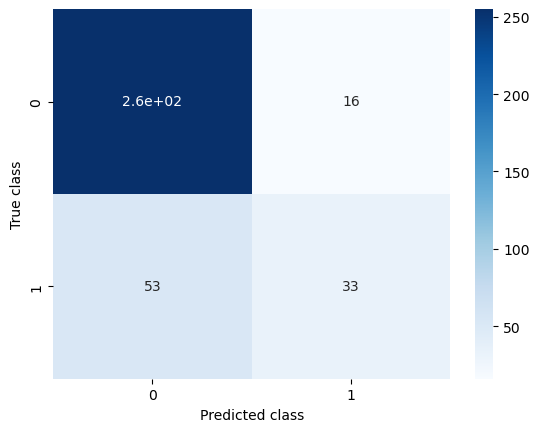

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       271
         1.0       0.67      0.38      0.49        86

    accuracy                           0.81       357
   macro avg       0.75      0.66      0.68       357
weighted avg       0.79      0.81      0.79       357



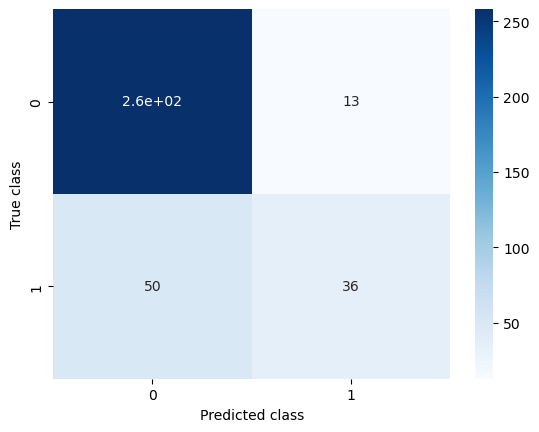

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       271
         1.0       0.73      0.42      0.53        86

    accuracy                           0.82       357
   macro avg       0.79      0.69      0.71       357
weighted avg       0.81      0.82      0.80       357



In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define the function to train the models and output confusion matrix and classification report
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    # Train the model
    trained_model = model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = trained_model.predict(X_test)

    # Compute the accuracy, confusion matrix and classification report
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.xlabel("Predicted class")
    plt.ylabel("True class")
    plt.show()

    # Print the classification report
    print("Classification Report:")
    print(class_report)

    return trained_model, accuracy, cm, class_report


# Train and evaluate the xgboost model
xgb_model, xgb_accuracy, xgb_conf_matrix, xgb_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, XGBClassifier
                                                                                (subsample =0.7500000000000002, n_estimators = 170, min_child_weight= 5, 
                                                                                 max_depth = 3, learning_rate = 0.09999999999999999, colsample_bytree= 0.6000000000000001
                                                                                ))

xgb_model, xgb_accuracy, xgb_conf_matrix, xgb_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, XGBClassifier
                                                                                ())

# Train and evaluate the gradient boosting model
#gb_model, gb_accuracy, gb_conf_matrix, gb_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, GradientBoostingClassifier
                                                                            #(subsample = 0.6, n_estimators=80, min_samples_split=9, min_samples_leaf= 1, 
                                                                             #max_features = None, max_depth= 3, learning_rate= 0.03, random_state=42))

# Train and evaluate the SVM
#svm_model, svm_accuracy, svm_conf_matrix, svm_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, 
                                                                                #SVC(kernel='rbf'))

# Train and evaluate the random forest model
#rf_model, rf_accuracy, rf_conf_matrix, rf_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42))

S431 0.07326162606477737
S469 0.04711746796965599
C408 0.045508794486522675
C102 0.03896879404783249
C409 0.030720924958586693
L620 0.030064692720770836
B903 0.02632042020559311
S464 0.023816343396902084
S467 0.021026941016316414
E514 0.02089223638176918
C153 0.02009516768157482
H102 0.020054655149579048
C118 0.019907748326659203
C401 0.019436940550804138
S463 0.019436897709965706
L623 0.01861507259309292
C159 0.018504390493035316
E406 0.017736008390784264
L622 0.01769128441810608
H129 0.017292233183979988
C117 0.017140842974185944
C180 0.016805065795779228
K087 0.016418760642409325
C107 0.015908828005194664
X105 0.015899892896413803
E403 0.015397819690406322
C119 0.01530533842742443
C116 0.015167757868766785
H105 0.01489108707755804
S529 0.01443199161440134
C203 0.014389878138899803
H121 0.01382947526872158
T103 0.013735257089138031
X103 0.013596409000456333
C105 0.012930648401379585
L621 0.011915404349565506
C111 0.011896160431206226
K086 0.011684978380799294
C103 0.01147634722292423

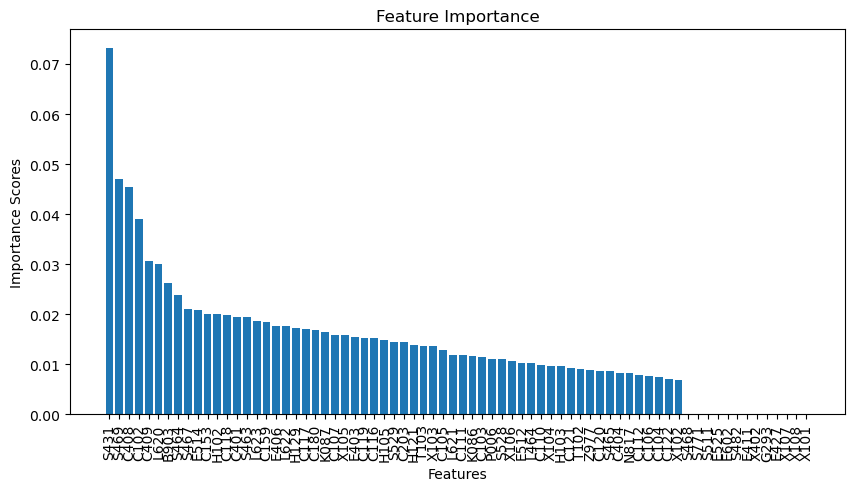

In [52]:
from sklearn.datasets import make_classification

# Get the feature importances
importances = xgb_model.feature_importances_
    
# Create a dataframe of feature names and importance scores
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the dataframe by importance score, from high to low
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Output the feature names and importance scores
for index, row in feature_importances.iterrows():
    print(row['feature'], row['importance'])

# Create a bar plot of feature importance scores
plt.figure(figsize=(10,5))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importance')
plt.show()

In [53]:
import xgboost as xgb

# 특성 중요도 
importances = xgb_model.feature_importances_
importances

array([0.0081695 , 0.01373526, 0.00964686, 0.01071109, 0.01589989,
       0.01105922, 0.01359641, 0.00971764, 0.00686616, 0.00902822,
       0.01443199, 0.01099158, 0.        , 0.        , 0.        ,
       0.        , 0.04550879, 0.02381634, 0.0194369 , 0.00875322,
       0.04711747, 0.01023438, 0.03072092, 0.        , 0.        ,
       0.        , 0.02102694, 0.02089224, 0.        , 0.07326163,
       0.        , 0.        , 0.        , 0.02632042, 0.01489109,
       0.01382948, 0.03896879, 0.00995499, 0.00748237, 0.01990775,
       0.01943694, 0.00890035, 0.        , 0.        , 0.01293065,
       0.00765869, 0.01590883, 0.01147635, 0.01714084, 0.01516776,
       0.01189616, 0.00782361, 0.01530534, 0.00875322, 0.00930398,
       0.00715147, 0.01773601, 0.01539782, 0.02009517, 0.01641876,
       0.01168498, 0.00834174, 0.01016113, 0.01729223, 0.01438988,
       0.02005466, 0.01680507, 0.01850439, 0.03006469, 0.0119154 ,
       0.01769128, 0.01861507], dtype=float32)

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.87       271
         1.0       0.63      0.40      0.49        86

    accuracy                           0.80       357
   macro avg       0.73      0.66      0.68       357
weighted avg       0.78      0.80      0.78       357



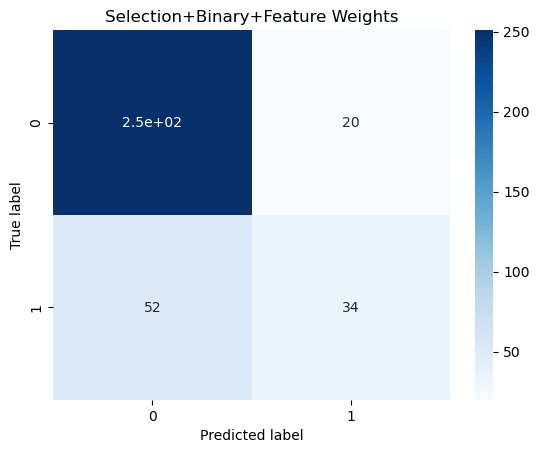

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb


# feature 선택
selected_features = ['H103', 'X106', 'X105', 'X103', 'X104', 'X102', 'T102', 'L620', 'L621',
       'T103', 'L622', 'L623', 'P006', 'N817', 'C408', 'E512', 'S469', 'H105',
       'H121', 'C102', 'C110', 'C104', 'C119', 'C120', 'C121', 'C122', 'C401',
       'E406', 'E403', 'Z977', 'C153', 'K087', 'K086', 'E427', 'C404', 'L464']

remaining_features = list(set(X.columns) - set(selected_features))

# 선택된 feature의 가중치 설정
feature_weights = {'H103': 1, 'X106': 1, 'X105': 1, 'X103': 1, 'X104': 1, 'X102': 1, 
                   'T102': 1, 'L620': 3, 'L621': 1, 'T103': 1, 'L622': 1, 'L623': 2, 
                   'P006': 1, 'N817': 1, 'C408': 3, 'E512': 1, 'S469': 3, 'H105': 1,
                   'H121': 1, 'C102': 2, 'C110': 1, 'C104': 1, 'C119': 1, 'C120': 1, 
                   'C121': 1, 'C122': 1, 'C401': 1,'E406': 1, 'E403': 2, 'Z977': 2, 
                   'C153': 1, 'K087': 1, 'K086': 1, 'E427': 3, 'C404': 1, 'L464': 1}

# 선택된 feature들의 데이터만 추출
X_weighted = df[selected_features].copy()

# 가중치 부여
for feature in feature_weights.keys():
    X_weighted[feature] = X_weighted[feature] * feature_weights[feature]

    
    
# 선택되지 않은 feature들의 데이터만 추출
X_unweighted = df[remaining_features]

# 선택된 feature들과 선택되지 않은 feature들을 합치기
X = pd.concat([X_weighted, X_unweighted], axis=1)

# 클래스 라벨 추출
y = df["annotation_result"]

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성
model = xgb.XGBClassifier()

# 모델 훈련
model.fit(X_train, y_train)

# 예측 결과 출력
y_pred = model.predict(X_test)

# classification report 출력
print(classification_report(y_test, y_pred))

# confusion matrix 출력
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Selection+Binary+Feature Weights')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

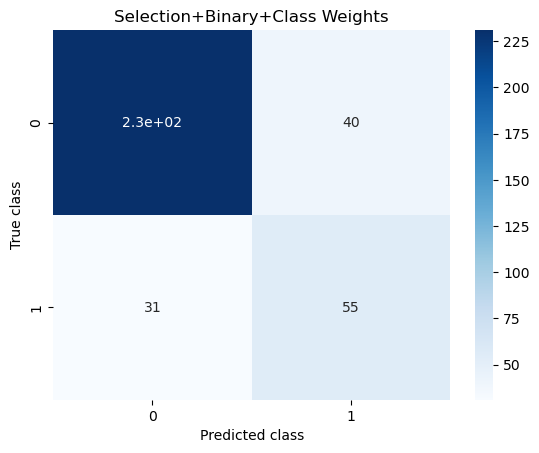

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       271
         1.0       0.58      0.64      0.61        86

    accuracy                           0.80       357
   macro avg       0.73      0.75      0.74       357
weighted avg       0.81      0.80      0.80       357



In [55]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)

# scale_pos_weight 값을 N로 설정하여 모델 학습
param = {'max_depth': 3, 'eta': 0.1, 'scale_pos_weight': 2.7}
num_round = 10
bst = xgb.train(param, dtrain, num_round)

# 테스트 데이터 예측
dtest = xgb.DMatrix(data=X_test)
y_pred = bst.predict(dtest)
y_pred = [1 if val > 0.5 else 0 for val in y_pred]

# classification report 출력
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title('Selection+Binary+Class Weights')
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()
print(classification_report(y_test, y_pred))

In [56]:
# Selection + Binary + Feature Weights + Class Weights 인지 확인 (위의 confusion matrix)

# feature 선택
selected_features = ['H103', 'X106', 'X105', 'X103', 'X104', 'X102', 'T102', 'L620', 'L621',
       'T103', 'L622', 'L623', 'P006', 'N817', 'C408', 'E512', 'S469', 'H105',
       'H121', 'C102', 'C110', 'C104', 'C119', 'C120', 'C121', 'C122', 'C401',
       'E406', 'E403', 'Z977', 'C153', 'K087', 'K086', 'E427', 'C404', 'L464']

remaining_features = list(set(X.columns) - set(selected_features))

# 선택된 feature의 가중치 설정
feature_weights = {'H103': 1, 'X106': 1, 'X105': 1, 'X103': 1, 'X104': 1, 'X102': 1, 
                   'T102': 1, 'L620': 3, 'L621': 1, 'T103': 1, 'L622': 1, 'L623': 2, 
                   'P006': 1, 'N817': 1, 'C408': 3, 'E512': 1, 'S469': 3, 'H105': 1,
                   'H121': 1, 'C102': 2, 'C110': 1, 'C104': 1, 'C119': 1, 'C120': 1, 
                   'C121': 1, 'C122': 1, 'C401': 1,'E406': 1, 'E403': 2, 'Z977': 2, 
                   'C153': 1, 'K087': 1, 'K086': 1, 'E427': 3, 'C404': 1, 'L464': 1}

# 선택된 feature들의 데이터만 추출
X_weighted = df[selected_features].copy()

# 가중치 부여
for feature in feature_weights.keys():
    X_weighted[feature] = X_weighted[feature] * feature_weights[feature]
    
# 선택되지 않은 feature들의 데이터만 추출
X_unweighted = df[remaining_features]

# 선택된 feature들과 선택되지 않은 feature들을 합치기
X = pd.concat([X_weighted, X_unweighted], axis=1)

# 클래스 라벨 추출
y = df["annotation_result"]

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(data=X_train, label=y_train)

# scale_pos_weight 값을 N로 설정하여 모델 학습
param = {'max_depth': 3, 'eta': 0.1, 'scale_pos_weight': 2.7}
num_round = 10
bst = xgb.train(param, dtrain, num_round)

In [57]:
# 테스트 데이터 예측
dtest = xgb.DMatrix(data=X_test)
y_pred = bst.predict(dtest)
y_pred = [1 if val > 0.5 else 0 for val in y_pred]

In [58]:
# 모델 훈련
#model.fit(X_train, y_train)

# 예측 결과 출력
y_pred = model.predict(X_test)

# confusion matrix 출력
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Selection+Binary+Feature/Class Weights')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# classification report 출력
print(classification_report(y_test, y_pred))

ValueError: feature_names mismatch: ['H103', 'X106', 'X105', 'X103', 'X104', 'X102', 'T102', 'L620', 'L621', 'T103', 'L622', 'L623', 'P006', 'N817', 'C408', 'E512', 'S469', 'H105', 'H121', 'C102', 'C110', 'C104', 'C119', 'C120', 'C121', 'C122', 'C401', 'E406', 'E403', 'Z977', 'C153', 'K087', 'K086', 'E427', 'C404', 'L464', 'E602', 'C107', 'G293', 'S482', 'X101', 'C203', 'C116', 'X107', 'C117', 'S528', 'B903', 'H129', 'E525', 'S771', 'C105', 'S467', 'S431', 'C159', 'E411', 'S465', 'C103', 'H102', 'C180', 'C111', 'C409', 'S468', 'X402', 'S463', 'S529', 'S511', 'S464', 'X108', 'C118', 'E514', 'C112', 'C106'] ['H103', 'X106', 'X105', 'X103', 'X104', 'X102', 'T102', 'L620', 'L621', 'T103', 'L622', 'L623', 'P006', 'N817', 'C408', 'E512', 'S469', 'H105', 'H121', 'C102', 'C110', 'C104', 'C119', 'C120', 'C121', 'C122', 'C401', 'E406', 'E403', 'Z977', 'C153', 'K087', 'K086', 'E427', 'C404', 'L464', 'E602', 'C107', 'G293', 'S482', 'X101', 'C203', 'C116', 'X107', 'C117', 'S528', 'B903', 'H129', 'E525', 'S771', 'C105', 'S467', 'S431', 'C159', 'E411', 'S465', 'C103', 'H102', 'C180', 'C111', 'C409', 'S468', 'X402', 'S463', 'S529', 'S464', 'X108', 'C118', 'S511', 'E514', 'C112', 'C106']